# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Loading Data

In [2]:
df = pd.read_csv("/kaggle/input/roblox-stock-pricing-2021-2023/RBLX.csv")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-11,74.930000,77.779999,70.129997,73.900002,73.900002,59629300
1,2021-03-12,72.470001,72.959999,69.110001,69.699997,69.699997,19714700
2,2021-03-15,70.019997,74.059998,66.250000,72.150002,72.150002,19549800
3,2021-03-16,73.730003,78.000000,73.180000,77.000000,77.000000,30274400
4,2021-03-17,76.029999,79.099998,74.889999,76.790001,76.790001,10054100
5,2021-03-18,76.000000,77.000000,66.800003,67.300003,67.300003,9627400
6,2021-03-19,69.470001,72.699997,68.080002,70.500000,70.500000,6776500
7,2021-03-22,71.809998,72.489998,69.540001,70.000000,70.000000,4238500
8,2021-03-23,70.099998,71.750000,67.629997,68.000000,68.000000,4456000
9,2021-03-24,69.970001,70.000000,64.010002,64.500000,64.500000,5460000


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.shape

(572, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,57.255086,59.117755,55.400136,57.273304,57.273304,1.704303e+07
std,24.847962,25.638251,23.921180,24.745580,24.745580,1.354966e+07
min,21.920000,25.670000,21.650000,23.190001,23.190001,2.420200e+06
25%,37.745000,38.642501,36.362499,37.504999,37.504999,8.203150e+06
50%,45.340000,46.572500,44.137499,45.445000,45.445000,1.383645e+07
75%,78.241251,80.199999,76.736251,77.937498,77.937498,2.081752e+07
max,140.735001,141.600006,128.539993,134.720001,134.720001,1.057943e+08


# Data visualization

<Axes: ylabel='Density'>

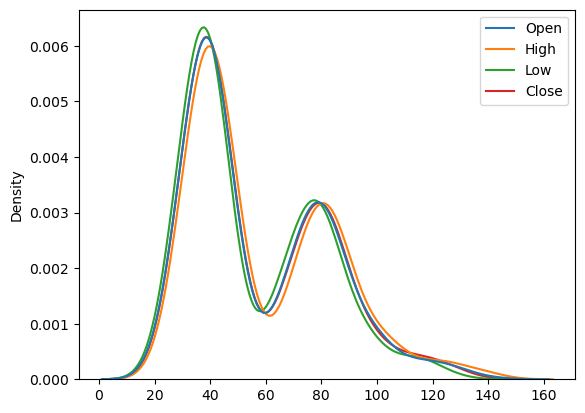

In [7]:
sns.kdeplot(data = df[['Open', 'High', 'Low', 'Close']])

<Axes: xlabel='Open', ylabel='Count'>

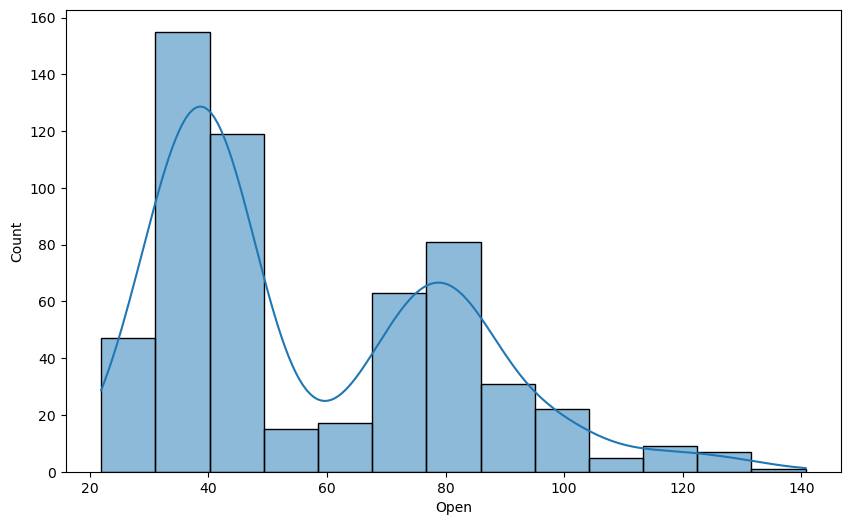

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Open', kde=True)

# Histogram: Distribution of Roblox Stock Closing Price


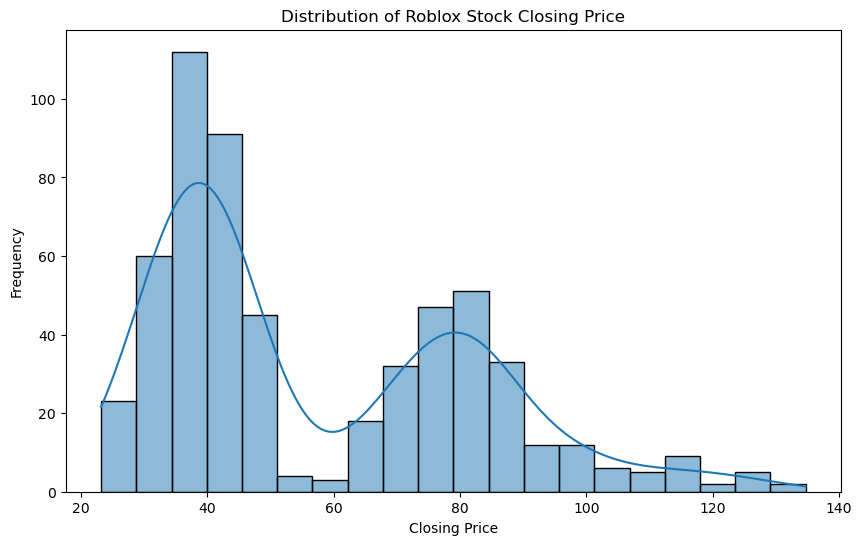

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Close', bins=20, kde=True)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Roblox Stock Closing Price')
plt.show()


# Box plot: Distribution of Roblox Stock Closing Price by Year

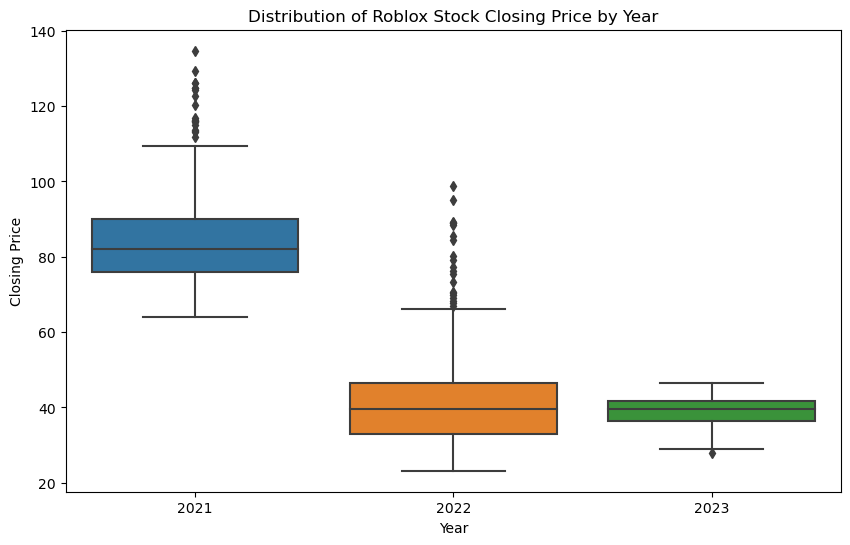

In [10]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Year', y='Close')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Distribution of Roblox Stock Closing Price by Year')
plt.show()

# Split the data into features (X) and target variable (y)

In [11]:
X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close'].values

# Split the data into training and testing sets


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions on the test set

In [14]:
y_pred = model.predict(X_test)

# Visualize the Linear Regression predictions for 'Close' values

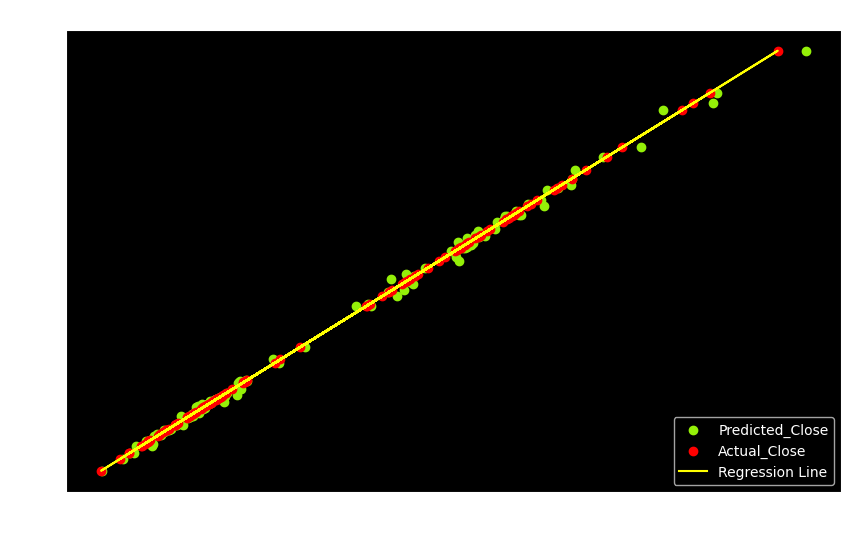

In [15]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
plt.title('Linear Regression', color="white")
plt.scatter(y_pred, y_test, color="#94F008")
plt.scatter(y_test, y_test, color="red")
plt.plot(y_test, y_test, color="yellow")
plt.legend(["Predicted_Close", "Actual_Close", "Regression Line"], loc="lower right", facecolor='black', labelcolor='white')

plt.xlabel('Predicted Close Price')
plt.ylabel('Actual Close Price')

plt.show()

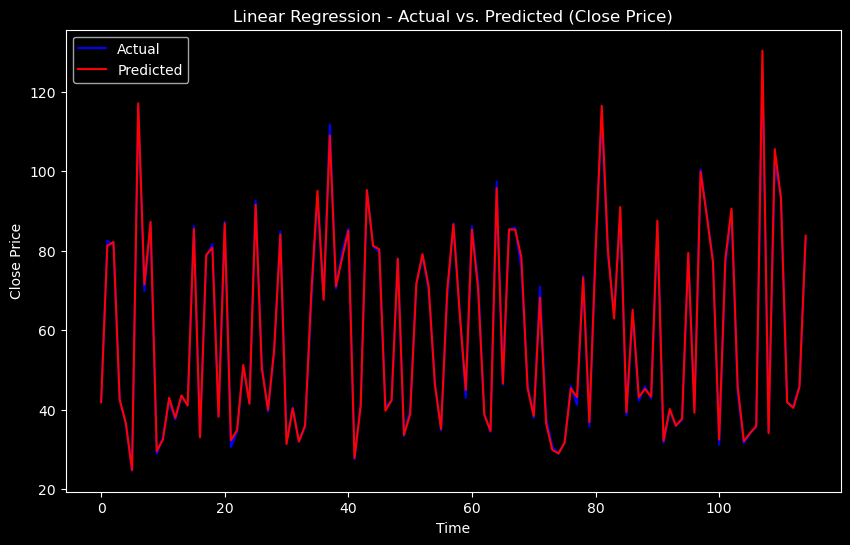

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Linear Regression - Actual vs. Predicted (Close Price)')
plt.legend()
plt.show()


# Model Evaluation

In [17]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 1.2155115186677283
Root Mean Squared Error (RMSE): 1.1025023894158816
R-squared (R2) Score: 0.9980006660797175


# Saving the Prediction Data as CSV

In [18]:
# Assuming y_pred contains the predicted values

# Create a DataFrame with the predicted values
prediction_df = pd.DataFrame({'Predicted': y_pred})

# Save the DataFrame as a CSV file
prediction_df.to_csv('prediction.csv', index=False)

print("CSV file 'prediction.csv' successfully saved!")


CSV file 'prediction.csv' successfully saved!
